Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).


Below, please fill in your name and collaborators, if any:

In [ ]:
NAME = "ROBERT FOURNIER"
COLLABORATORS = ""

# Assignment 4 - Classification

In this assignment, you will practice using the kNN (k-Nearest Neighbors) algorithm to solve a classification problem.
The kNN is a simple and robust classifier, which is used in different applications.

We will use the Iris dataset for this assignment.
The dataset was first introduced by statistician R. Fisher and consists of 50 observations from each of three species Iris (_Iris setosa_, _Iris virginica_ and _Iris versicolor_). For each sample, 4 features are given: the sepal length and width, and the petal length and width.

The goal is to train kNN algorithm to distinguish the species from one another.

1. The dataset can be downloaded from UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/.

2. Download `iris.data` file from the Data Folder. The Data Set description with the definitions of all the columns can be found on the dataset page - https://archive.ics.uci.edu/ml/datasets/Iris. Alternatively, you can import the data using sklearn.datasets. You will need to dowload both the sepal/petal data and the target variable information, then merge the two datasets.

3. _(1 points)_ Load the data from the file (`iris.data`) into the DataFrame. Set the names of columns according to the column definitions given in Data Description.

4. _(2 points)_ **Data inspection.** 
    - Display the first 5 rows of the dataset and use any relevant functions that can help you to understand the data.
    - Prepare 2 scatter plots - `sepal_width` vs `sepal_length` and `petal_width` vs `petal_length`. Scatter plots should show each class in different color (`seaborn.lmplot` is recommended for plotting). 

5. _(2 points)_ **Prepare the data for classification**. 
    - Using the pandas operators prepare the feature variables `X` and the response `Y` for the fit. Note that `sklean` expects data as arrays, so convert extracted columns into arrays.

6. _(1 point)_ **Split** the data into `train` and `test` using `sklearn` `train_test_split` function.

7. _(2 points)_ **Run the fit** using `KNeighborsClassifier` from `sklearn.neighbors`. 
    - First, instantiate the model,
    - Then, run the classifier on the training set.

8. _(3 points)_ Use learning model to **predict the class from features**, run prediction on `X` from test part. 
    - Show the **accuracy score** of the prediction by comparing predicted iris classes and the `Y` values from the test.
    - Comparing these two arrays (predicted classes and test `Y`), count the numbers of correct predictions and predictions that were wrong. (**HINTS:** `NumPy` arrays can be compared using `==` operator. You can also use `NumPy`'s operator `count_nonzero` to count number of non-False values).

9. _(4 points)_ In this task, we want to see how accuracy score and the number of correct predictions change with the number of neighbors `k`. We will use the following **number of neighbors `k`: 1, 3, 5, 7, 10, 20, 30, 40, and 50**:
    - Generate 10 random train/test splits for each value of `k`
    - Fit the model for each split and generate predictions
    - Average the accuracy score for each `k`
    - Calculate the average number of correct predictions for each `k` as well
    - Plot the accuracy score for different values of `k`. What conclusion can you make based on the graph?


In [ ]:
# Here are all imports that you will need

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Data download from sklearn
from sklearn.datasets import load_iris
data=load_iris().data
target=load_iris().target
df_data=pd.DataFrame(data,columns=['sepal_length','sepal_width','petal_length','petal_width'])
df_target=pd.DataFrame(target,columns=['target'])

# Remember to merge the DataFrames into one after they are created.

First 5 rows: 
   sepal_length  sepal_width  petal_length  petal_width  target
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0
3           4.6          3.1           1.5          0.2       0
4           5.0          3.6           1.4          0.2       0


Describe method: 
       sepal_length  sepal_width  petal_length  petal_width      target
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.057333      3.758000     1.199333    1.000000
std        0.828066     0.435866      1.765298     0.762238    0.819232
min        4.300000     2.000000      1.000000     0.100000    0.000000
25%        5.100000     2.800000      1.600000     0.300000    0.000000
50%        5.800000     3.000000      4.350000     1.300000    1.000000
75%        6.400000     3.300000      5.100000     1.800000    2.000000
max  

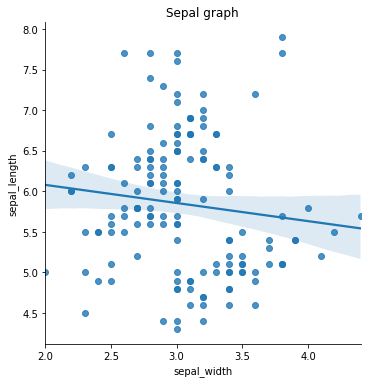

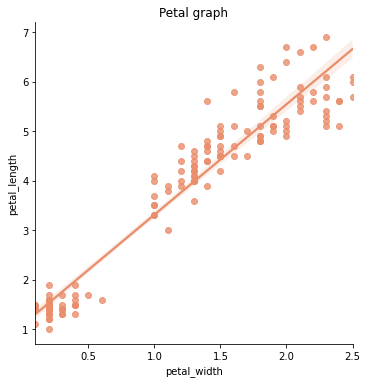

In [ ]:
# Using join method to concatenate the df_target to df_data on index, left-join
# Otherwise could use df_data['Target'] = df_target['Target']
df_total_dataset = df_data.join(df_target)

# Data inspection
print(f"First 5 rows: \n{df_total_dataset.head(5)}") # first 5 rows
print(f"\n\nDescribe method: \n{df_total_dataset.describe()}\n\n") # describe function
print(df_total_dataset.info()) # information function
print(f"\n\nCorrelation method: \n{df_total_dataset.corr()}\n\n") # Correlation function

# Plotting some features and correlation
sns.set_palette("tab10") # change color palette for visual disonance
sns.lmplot(data=df_total_dataset, x='sepal_width', y='sepal_length')
plt.title("Sepal graph") # set title to sepal plot above

# Plotting the petal graph 
sns.set_palette("flare") # change color palette for visual disonance 
sns.lmplot(data=df_total_dataset, x='petal_width', y='petal_length') 
plt.title("Petal graph") # set title to petal plot above
plt.show()

In [ ]:
# Prepare data for classification

# first shuffle the dataset for randomness and to reduce ordering bias
df_total_dataset = df_total_dataset.sample(frac=1)

X = df_total_dataset[['sepal_width', 'sepal_length', 
                      'petal_width', 'petal_length']].values

Y = df_total_dataset['target'].values

# confirm that X and Y are np arrays
print(f"Type of X: {type(X)}")
print(f"Type of Y: {type(Y)}")

# get a sneak peak at one record for QA
print(f"One record of features: {X[10]}")
print(f"It's target: {Y[10]}")

Type of X: <class 'numpy.ndarray'>
Type of Y: <class 'numpy.ndarray'>
One record of features: [2.4 5.5 1.  3.7]
It's target: 1


In [ ]:
# Split into train, test datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state = 8)

print(len(X_train), len(Y_train), len(X_test), len(Y_test))

112 112 38 38


In [ ]:
# Instantiating the model
knn_model = KNeighborsClassifier()

# Fitting the model
fitted_model = knn_model.fit(X_train, Y_train)

In [ ]:
from sklearn import metrics # scikit learn library of metrics

# Run predictions on the X_test variable
predictions = fitted_model.predict(X_test)

# Get the accuracy score
print(f"Accuracy score: {metrics.accuracy_score(Y_test, predictions):.04f}")

# Print the boolean comparator for numpy arrays
print(f"Correct predictions: {np.count_nonzero(Y_test == predictions)}")
print(f"Out of of: {len(predictions)}")

Accuracy score: 0.9737
Correct predictions: 37
Out of of: 38


In [ ]:
# For the last task, let's pull the knearestneighbour quantities into a list
# and iterate through it with the code we've written. Although we'll keep the 
# accuracies in a list. 

NEIGHBOURS = [1, 3, 5, 7, 10, 20, 30, 40, 50] # parameters to test
ACCURACY = [] # initialize empty list to fill in for loop

# iterate through the parameters
for _neighbour in NEIGHBOURS:

  # run the train test splits, setting the random variable to the parameter
  # for reproducability
  _X_train, _X_test, _Y_train, _Y_test = train_test_split(X, 
                                                          Y, 
                                                          test_size=0.30, 
                                                          random_state = _neighbour
                                                          )
  
  # fit the model
  _fitted_model = KNeighborsClassifier().fit(_X_train, _Y_train)

  # run predictions and then add the accuracy to the accuracy list
  _predictions = _fitted_model.predict(_X_test)
  _accuracy = metrics.accuracy_score(_Y_test, _predictions)

  # Print out the parameter
  print(f"\nNeigbours: {_neighbour}")
  # Get the accuracy score
  print(f"Accuracy score: {_accuracy:.04f}")

  # Print the boolean comparator for numpy arrays
  print(f"Correct predictions: {np.count_nonzero(_Y_test == _predictions)}")
  ACCURACY.append(_accuracy)


Neigbours: 1
Accuracy score: 0.9333
Correct predictions: 42

Neigbours: 3
Accuracy score: 1.0000
Correct predictions: 45

Neigbours: 5
Accuracy score: 0.9333
Correct predictions: 42

Neigbours: 7
Accuracy score: 0.9556
Correct predictions: 43

Neigbours: 10
Accuracy score: 0.9333
Correct predictions: 42

Neigbours: 20
Accuracy score: 0.9778
Correct predictions: 44

Neigbours: 30
Accuracy score: 0.9556
Correct predictions: 43

Neigbours: 40
Accuracy score: 0.9333
Correct predictions: 42

Neigbours: 50
Accuracy score: 0.9556
Correct predictions: 43


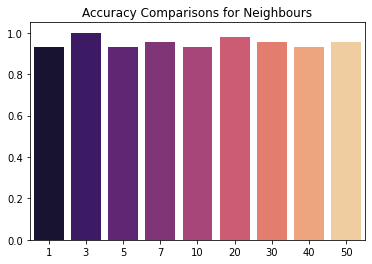

In [ ]:
# Nice simple barplot outlining the paramters and resulting accuracy
sns.barplot(x=NEIGHBOURS, y=ACCURACY, palette='magma')
plt.title("Accuracy Comparisons for Neighbours")
plt.show()

From the above chart and the printouts from predicting, the parameter with the best results is 5. The KNearestNeighbour model should be instantiated with 5 as the number of neighbours to evaluate. This result had tied for the highest accuracy (100%), but was also the lowest in number. Following the principle of simplicity, 5 is the ideal parameter. Going with 50 - the other number of neighbours that provided 100% accuracy would mean small pockets of classifications with boundaries that were indistinct from one another and limit the generalization of the model.
